<a href="https://colab.research.google.com/github/LYZAcell/data_study/blob/main/%20BDA(%ED%8C%90%EB%8B%A4%EC%8A%A4)/%EC%88%98%EC%97%85/250119_9%E1%84%80%E1%85%B5_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%8E%E1%85%A5%E1%84%85%E1%85%B5(%E1%84%91%E1%85%A1%E1%86%AB%E1%84%83%E1%85%A1%E1%84%89%E1%85%B3)_%E1%84%89%E1%85%B5%E1%84%80%E1%85%A8%E1%84%8B%E1%85%A7%E1%86%AF%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('crime.csv')
#datetime 자료형이 시계열데이터의 문법을 적용 받는다.
df.info()

df_1 = df.copy()

#시계열데이터로 자료형을 변환해야 한다.
#pd.to_datetime : 문자열을 날짜/시간 객체로 변환

df_1['REPORTED_DATE']=pd.to_datetime(df_1['REPORTED_DATE'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [ ]:
df_1.info()
df_1['REPORTED_DATE']

##시계열 데이터처럼 문법을 사용하려면 -> 한 번 더 가공해야 한다.
## Datetime Index로 만든다.
## set_index()
## 시계열 데이터로 인덱스 변환
df_1=df_1.set_index('REPORTED_DATE') # 이렇게 만들면 자유롭게 시계열데이터 문법을 사용할 수 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [ ]:
#인덱스로 설정하면 시계열을 자유롭게 추출할 수 있다.
df_1.loc['2013']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-01-21 11:58:00,11,traffic-accident,traffic-accident,-105.025061,39.696746,mar-lee,0,1
2013-01-24 13:49:00,12,theft-from-bldg,larceny,-104.934536,39.731625,hale,1,0
2013-07-29 10:50:00,13,theft-parts-from-vehicle,theft-from-motor-vehicle,-104.922385,39.777607,northeast-park-hill,1,0
2013-03-12 19:52:00,14,burglary-residence-no-force,burglary,-104.929717,39.759760,north-park-hill,1,0
2013-07-02 08:45:00,15,traffic-accident-hit-and-run,traffic-accident,-104.931289,39.678216,goldsmith,0,1
...,...,...,...,...,...,...,...,...
2013-09-21 04:28:00,458677,traf-other,all-other-crimes,-105.025239,39.769287,highland,1,0
2013-08-31 05:43:00,458678,assault-simple,other-crimes-against-persons,-105.052770,39.695152,mar-lee,1,0
2013-09-03 22:43:00,458679,violation-of-court-order,all-other-crimes,-104.920292,39.762160,northeast-park-hill,1,0


In [ ]:
#연월일
df_1.loc['2013-06']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-06-18 11:46:00,376,theft-bicycle,larceny,-105.036775,39.660669,harvey-park-south,1,0
2013-06-10 13:59:00,380,assault-simple,other-crimes-against-persons,-104.994715,39.739737,civic-center,1,0
2013-06-19 13:40:00,423,traffic-accident,traffic-accident,-104.900944,39.783108,stapleton,0,1
2013-06-20 07:45:00,424,criminal-mischief-other,public-disorder,-104.913188,39.678152,goldsmith,1,0
2013-06-13 01:45:00,441,traf-other,all-other-crimes,-105.040241,39.700369,westwood,1,0
...,...,...,...,...,...,...,...,...
2013-06-27 09:11:00,450552,threats-to-injure,public-disorder,-104.990480,39.728076,lincoln-park,1,0
2013-06-21 14:30:00,450606,theft-other,larceny,-104.982864,39.740166,north-capitol-hill,1,0
2013-06-18 09:59:00,450637,traffic-accident,traffic-accident,-105.003872,39.752299,union-station,0,1


In [ ]:
df_1.loc['2013-06-11']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-06-11 13:30:00,464,traffic-accident,traffic-accident,-105.052087,39.776569,berkeley,0,1
2013-06-11 01:29:00,897,burglary-poss-of-tools,burglary,-105.012709,39.696747,ruby-hill,1,0
2013-06-11 18:31:00,32606,traffic-accident,traffic-accident,-104.989557,39.780108,globeville,0,1
2013-06-11 19:53:00,35951,assault-simple,other-crimes-against-persons,-104.992029,39.735009,civic-center,1,0
2013-06-11 10:27:00,36778,theft-items-from-vehicle,theft-from-motor-vehicle,-105.038835,39.765586,west-highland,1,0
...,...,...,...,...,...,...,...,...
2013-06-11 09:51:00,449813,traffic-accident,traffic-accident,-104.940342,39.678191,university-hills,0,1
2013-06-11 13:42:00,449872,public-order-crimes-other,all-other-crimes,-104.976143,39.745906,north-capitol-hill,1,0
2013-06-11 07:55:00,450034,traffic-accident,traffic-accident,-105.039328,39.740342,west-colfax,0,1


In [ ]:
df_1.loc['Dec 2013']

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-12-28 17:46:00,85,theft-from-bldg,larceny,-104.931289,39.678216,goldsmith,1,0
2013-12-28 19:17:00,86,theft-items-from-vehicle,theft-from-motor-vehicle,-105.011527,39.757185,highland,1,0
2013-12-29 08:49:00,87,criminal-mischief-graffiti,public-disorder,-104.933096,39.756655,north-park-hill,1,0
2013-12-29 09:07:00,88,theft-items-from-vehicle,theft-from-motor-vehicle,-104.808121,39.788268,gateway-green-valley-ranch,1,0
2013-12-16 02:48:00,92,traf-other,all-other-crimes,-105.040589,39.732938,villa-park,1,0
...,...,...,...,...,...,...,...,...
2013-12-06 19:20:00,437597,aggravated-assault-dv,aggravated-assault,-105.065788,39.651943,bear-valley,1,0
2013-12-03 09:30:00,438396,theft-unauth-use-of-ftd,white-collar-crime,-104.957196,39.716844,cherry-creek,1,0
2013-12-27 14:58:00,441233,theft-unauth-use-of-ftd,white-collar-crime,-104.913539,39.740296,south-park-hill,1,0


In [ ]:
df_1.loc['2013-12-01'].sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-12-01 00:27:00,122046,police-false-information,all-other-crimes,-104.840066,39.793819,montbello,1,0
2013-12-01 00:36:00,83327,traf-other,all-other-crimes,-105.002810,39.740092,lincoln-park,1,0
2013-12-01 00:37:00,85329,traf-other,all-other-crimes,-105.000581,39.772979,sunnyside,1,0
2013-12-01 00:37:00,132411,traf-habitual-offender,all-other-crimes,-105.000581,39.772979,sunnyside,1,0
2013-12-01 00:46:00,5848,assault-simple,other-crimes-against-persons,-104.985739,39.735045,capitol-hill,1,0
...,...,...,...,...,...,...,...,...
2013-12-01 23:41:00,181472,drug-poss-paraphernalia,drug-alcohol,-104.939421,39.758294,north-park-hill,1,0
2013-12-01 23:41:00,95808,theft-of-motor-vehicle,auto-theft,-104.990480,39.728076,lincoln-park,1,0
2013-12-01 23:52:00,74121,traf-other,all-other-crimes,-105.014524,39.711179,athmar-park,1,0


In [ ]:
#시간에 대한 정렬
df_1.loc['2012-01-02'].between_time('00:00','20:00').sort_index()

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2012-01-02 00:06:00,414815,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,47176,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,75798,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,46063,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,435334,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,62094,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,45907,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,59317,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,447562,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [ ]:
df_1.at_time('06:00')

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2013-10-31 06:00:00,761,drug-heroin-possess,drug-alcohol,-104.998179,39.750697,union-station,1,0
2013-12-23 06:00:00,1253,theft-items-from-vehicle,theft-from-motor-vehicle,-105.028310,39.702480,westwood,1,0
2014-12-13 06:00:00,3134,theft-items-from-vehicle,theft-from-motor-vehicle,-105.027838,39.733552,villa-park,1,0
2014-05-05 06:00:00,6827,sex-aslt-rape,sexual-assault,NaN,NaN,stapleton,1,0
2017-04-06 06:00:00,12835,traffic-accident-hit-and-run,traffic-accident,-104.902847,39.785240,stapleton,0,1
...,...,...,...,...,...,...,...,...
2013-08-28 06:00:00,439034,aggravated-assault,aggravated-assault,-104.968277,39.743425,city-park-west,1,0
2012-01-11 06:00:00,449356,traffic-accident,traffic-accident,-104.896609,39.778257,stapleton,0,1
2017-09-08 06:00:00,453360,theft-of-motor-vehicle,auto-theft,-105.033755,39.755441,sloan-lake,1,0


In [ ]:
#resample 메서드 사용하면
df_1[['IS_CRIME']].resample('Y').sum()

,IS_CRIME
REPORTED_DATE,
2012-12-31,37286
2013-12-31,50698
2014-12-31,62690
2015-12-31,65894
2016-12-31,67381
2017-12-31,51902


In [ ]:
df_1[['IS_CRIME']].resample('M').sum()

,IS_CRIME
REPORTED_DATE,
2012-01-31,2660
2012-02-29,2353
2012-03-31,2869
2012-04-30,3070
2012-05-31,3321
...,...
2017-05-31,5965
2017-06-30,5972
2017-07-31,6005


In [ ]:
df_1[['IS_CRIME']].resample('W').sum()

,IS_CRIME
REPORTED_DATE,
2012-01-08,551
2012-01-15,600
2012-01-22,654
2012-01-29,655
2012-02-05,536
...,...
2017-09-03,1458
2017-09-10,1309
2017-09-17,1474


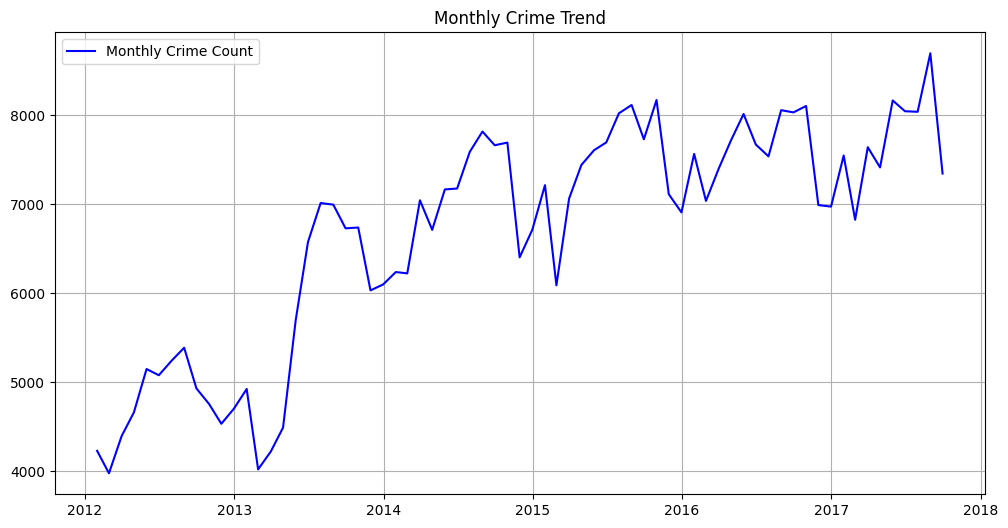

In [ ]:
import matplotlib.pyplot as plt
monthly_crime=df_1[['IS_CRIME']].resample('M').size()

plt.figure(figsize=(12,6))
plt.plot(monthly_crime, label= 'Monthly Crime Count',color='blue')
plt.title('Monthly Crime Trend')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_1['Hour'] = df_1.index.hour

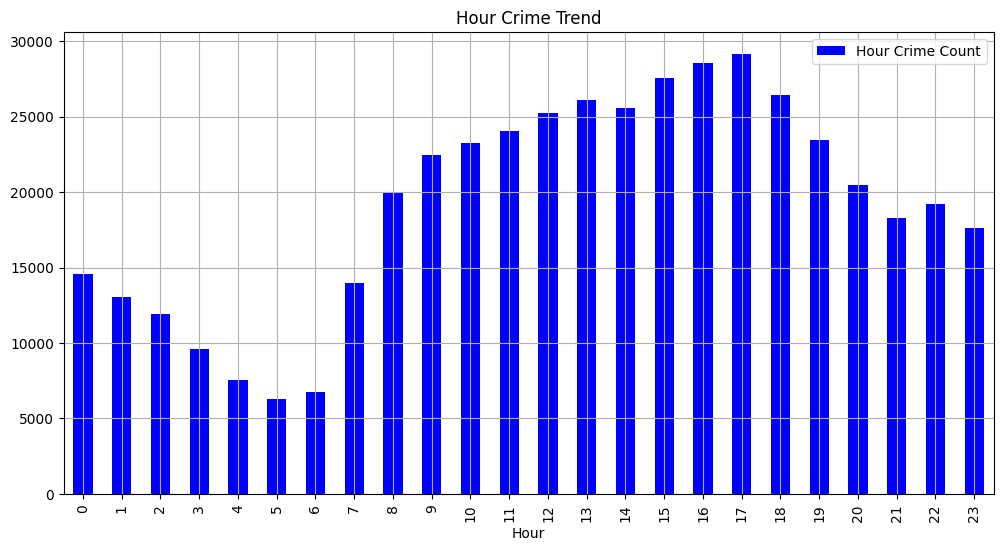

In [ ]:
# 범죄에 대한 시간에 다른 발생 수
Hour_crime=df_1.groupby('Hour')['IS_CRIME'].size()

plt.figure(figsize=(12,6))
Hour_crime.plot(kind = 'bar' , label= 'Hour Crime Count',color='blue')
plt.title('Hour Crime Trend')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_1

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,Hour
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,2
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,1
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,2
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,2
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,4
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,5
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,20
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,16


## 필수과제1
- IS_CRIME 범죄율기준으로 시계열적으로 분석하기
    - 월, 주별 기준으로
    - 어떤 type의 사건이 가장 많이 발생하는지?
    - 이 사건 발생의 type 변화에 대해서 확인하는 것
## 필수과제 2
- 지역적으로 봤을 때 특정 사건이 발생하는 지역들이 있는지?
    - 위도 경도 컬럼으로 특정 사건들이 발생하는 지역은 어디인지?
    
## 필수과제 3
- 가장 많은 범죄가 발생하는 지역들과 적은 범죄가 발생하는 지역들을 확인하고
    - 확인할 부분은 위도 경도데이터와 범죄카운트, 범죄 type내용
    - 둘의 유의미한 차이가 있는지 분석하는 것

### 이동평균(MA)
- Moving Average(MA) 시계열 데이터가 노이즈가 존재한다.
- 노이즈를 제거하고 간단하게 주요 추세를 살펴보는 통계적인 기법
- 데이터의 일정 기간동안 window 평균을 계산하여서 시계열적으로 부드럽게 smoothing하게 나타내는 것
---
- 단기적인 잡음(변동) 줄이고, 장기적인 패턴과 추세를 파악하려고 사용한다.
- 전처리 단계 등에서 충분히 사용할 수 있다.

- 추후 예제 코드로 다시 제공

## 시계열 분해 과정

- 시계열 데이터는 추세(트렌드), 계절성(seasonal), 주기, 오차 ->시계열데이터로 볼 수 있는데
- 시계열 데이터는 -> 추세, 계절성, 주기, 오차 등으로 다시 분해도 할 수 있다.

In [ ]:
#시계열 분해를 하는 패키지

from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(monthly_crime, model='additive',period=7)

In [ ]:
monthly_crime

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

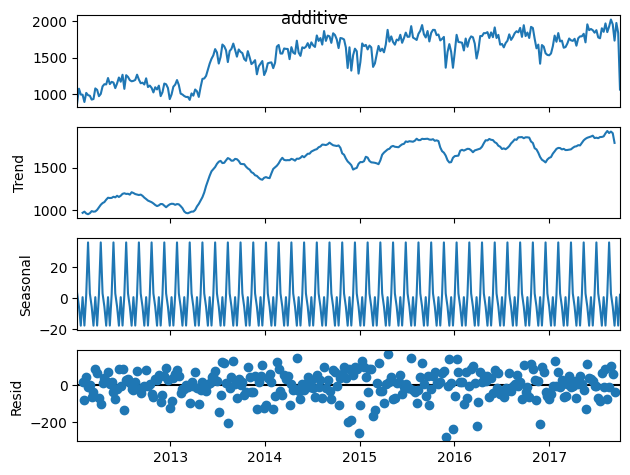

In [ ]:
result.plot()
plt.suptitle('additive')
plt.show()

### 필수과제4
- 필수과제3번에서 가장 많은 범죄가 있는 지역 5개와 가장 적은 범죄가 있는 지역 5개를 seasonal_decompose 하여서
- 차이를 분석해 주세요 (어떤 트렌드가 있는지?, 실제 범죄가 많은 곳과 적은 곳의 차이가 존재하는지?)

### 정상/ 비정상 시계열 데이터

In [ ]:
import numpy as np
np.random.seed(111)
time =np.arange(100)
trend =time * 0.5
noise = np.random.normal(0,1, 100)
data = trend + noise

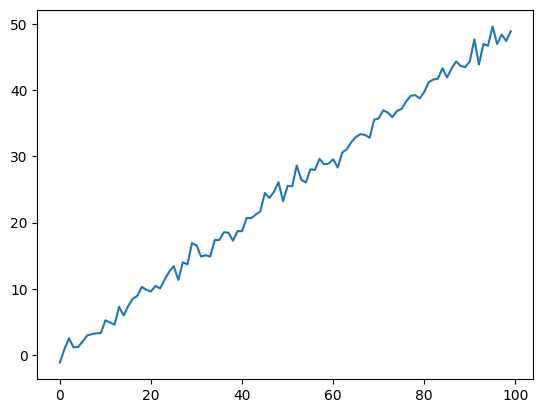

In [ ]:
#비정상 데이터
plt.plot(time, data, label='비정상')

In [ ]:
##비정상 시계열을 -> 정상으로 바꿔야 한다. 전처리를 해야 한다.
## 차분을 이용해서 진행했다.

diff_data =np.diff(data)

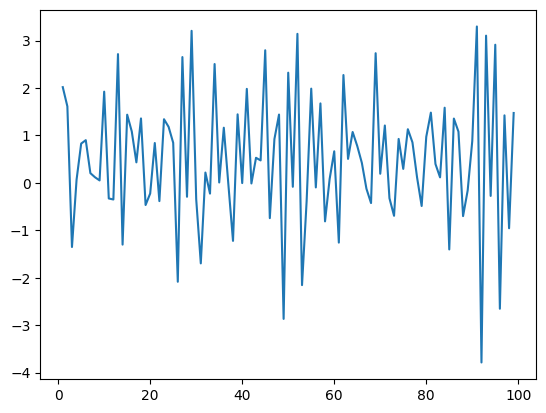

In [ ]:
plt.plot(time[1:], diff_data, label='1차 차분')

### ACF( Autocorrelation Function) 와 PACF(Partial Autocorrelation Function)
- ACF 자기상관 시계열 데이터가 시간 간격에 따라 얼마나 연관이 있는가를 측정하는 함수
- PACF 부분 자기상관 특정 시차에서 다른 시차의 영향을 제거한 상태에서 상관관계를 측정,
    - t시점에서 t-1, t-2 다른 시차의 영향을 배제한 상태에서 얼마나 독립적인가 보여준다.